# **SALES PREDICTION USING PYTHON**

Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('sales.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# checking missing value
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
# Define features (X) and target (y)
X = df[['TV', 'Radio', 'Newspaper']]  # Feature columns
y = df['Sales']  # Target column


In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Linear Regression Performance
y_pred_lr = lin_reg.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("\nLinear Regression Performance:")
print(f"Mean Squared Error: {mse_lr}")
print(f"R^2 Score: {r2_lr}")


Linear Regression Performance:
Mean Squared Error: 2.907756910271093
R^2 Score: 0.9059011844150825


In [ ]:
# Random Forest Performance
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Performance:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R^2 Score: {r2_rf}")


Random Forest Performance:
Mean Squared Error: 1.436150725000001
R^2 Score: 0.9535242847342004


Random Forest captures non-linear relationships between features (TV, Radio, Newspaper) and the target (Sales) better than Linear Regression, which assumes a linear relationship.

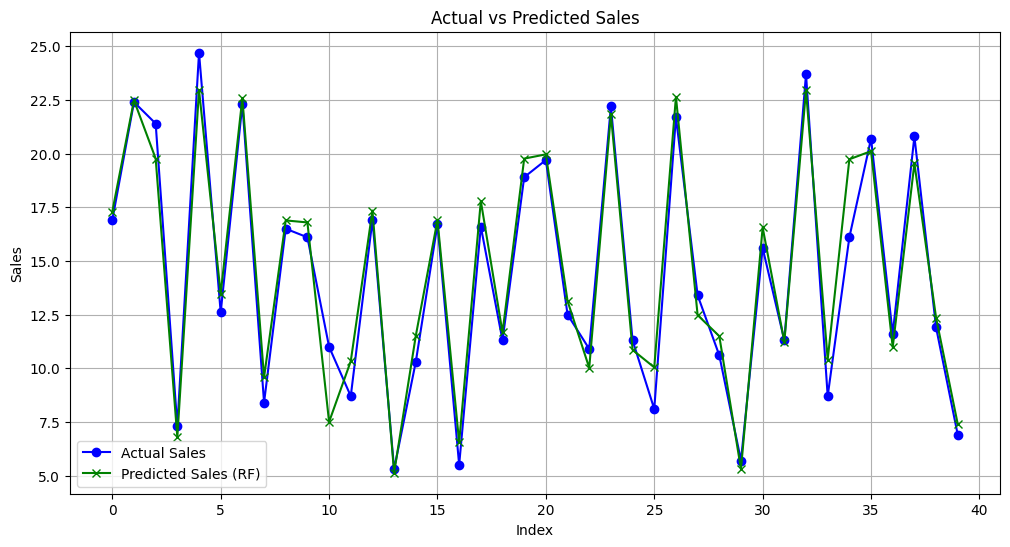

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test.values, label='Actual Sales', color='blue', marker='o')
plt.plot(range(len(y_pred_rf)), y_pred_rf, label='Predicted Sales (RF)', color='green', marker='x')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

In [ ]:
new_data = pd.DataFrame({
    'TV': [17.2],
    'Radio': [45.9],
    'Newspaper': [69.3]
})
new_data_scaled = scaler.transform(new_data)
sales_prediction = rf_reg.predict(new_data_scaled)
print(f"Predicted Sales for New Data: {sales_prediction[0]}")

Predicted Sales for New Data: 10.473000000000006
